## Mini-Project - Exploratory Data Analysis with Python an SQL language
#### Mini-Projeto - Análise Exploratória de Dados com Python e Linguagem SQL

In this Mini-Project, a basic **exploratory data analysis** is performed using Python, SQL language and SQLite Database. We will use publicly available data, about movies listed in <a href="https://www.imdb.com/interfaces/">IMDb</a>.

The 10 questions that guide the exploratory analysis throghout this project are:

- 1 - What a are the **most commons** movies categories in IMDb?
- 2 - What is the **number of titles** by **genre**?
- 3 - What is the **ratings median** of movies by **genre**?
- 4 - What is the **median** of movies ratings by **year of release**?
- 5 - What is the number of **rated movies** by **genre** related to the **year of release**?
- 6 - What is the movie with **longest duration**?
- 7 - What is the relation between **duration** and **genre**?
- 8 - What is the number of movies produced by a **country**?
- 9 - What are the Top 10 **best** movies (according to ratings)?
- 10 - What are the Top 10 **worst** movies (according to ratings)?  

**Obs**: Some of the cells (like type check cells, for example), commands and comments might look too basic, unecessary or redundant to some more experienced data scientists. This was made intentionaly, in order to help new learners in understanding some aspects of Data Science more easily.

## Instaling and Loading Packages
#### Instalando e Carregando Pacotes 

##### Main Extra Packages Used (beyond some of the usual ones used in data science, that you can find in the imports cell below):
- <a href="https://pypi.org/project/imdb-sqlite/">imdb-sqlite</a> (Imports IMDB TSV files into a SQLite database)
- <a href="https://pypi.org/project/pycountry/">pycountry</a>

In [ ]:
#Extra packages
!pip install -q imdb-sqlite
!pip install -q pycountry

In [2]:
# Imports
import re 
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

In [5]:
from platform import python_version
print(f'Python version: {python_version()}')

Python version: 3.7.12


In [17]:
print(f're version: {re.__version__}')
print(f'sqlite3 version: {sqlite3.sqlite_version}')
print(f'pycountry version: {pycountry.__version__}')
print(f'numpy version: {np.__version__}')
print(f'pandas: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')


re version: 2.2.1
sqlite3 version: 3.22.0
pycountry version: 20.7.3
numpy version: 1.19.5
pandas: 1.1.5
seaborn version: 0.11.2


## Loading Data
#### Carregando os Dados

In [ ]:
%%time
!imdb-sqlite # database provided by IMDb

In [19]:
# Connect to database 
connection = sqltite.connect("imdb.db")

In [20]:
# Pull list of tables
tables = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type='table'", connection)

type(tables)

pandas.core.frame.DataFrame

In [21]:
# Result visualization
tables.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [22]:
# Converting dataframe into a list
tables = tables["Table_Name"].values.tolist()

In [23]:
# Scroll through the list of tables in database and extract the scheme of each one
for table in tables:
  consult = "PRAGMA TABLE_INFO({})".format(table)
  result = pd.read_sql_query(consult, connection)
  print("Scheme of table:", table)
  display(result)
  print("-"*100)
  print("\n")

Scheme of table: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Scheme of table: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Scheme of table: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Scheme of table: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Scheme of table: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Scheme of table: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




## 1 - What a are the most commons movies categories in IMDb?
#### 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
##### What are the main categories of titles (movies)?

In [24]:
# Created SQL query
consult_1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type'''

In [25]:
# Pull off the result
result_1 = pd.read_sql_query(consult_1, connection)

In [26]:
display(result_1)

,type,COUNT
0,movie,590862
1,radioEpisode,1
2,short,835849
3,tvEpisode,6137573
4,tvMiniSeries,40194
5,tvMovie,133295
6,tvPilot,2
7,tvSeries,216547
8,tvShort,10334
9,tvSpecial,34471


In [27]:
# Computing the percentile of each type
result_1['percentage_1'] = (result_1['COUNT'] / result_1['COUNT'].sum()) * 100

In [28]:
display(result_1)

,type,COUNT,percentage_1
0,movie,590862,7.073262
1,radioEpisode,1,0.000012
2,short,835849,10.006024
3,tvEpisode,6137573,73.473441
4,tvMiniSeries,40194,0.481166
5,tvMovie,133295,1.595686
6,tvPilot,2,0.000024
7,tvSeries,216547,2.592304
8,tvShort,10334,0.123709
9,tvSpecial,34471,0.412655


In [29]:
# Creating a pie chart with only 4 categories (the main ones): The 3 main categories plus one categorie that includes the rest

others = {}

# Filters the percentage by 5% and then sums the total
others['COUNT'] = result_1[result_1['percentage_1'] < 5]['COUNT'].sum()

# Saves the percentage
others['percentage_1'] = result_1[result_1['percentage_1'] < 5]['percentage_1'].sum()

# Adjusting name 
others['type'] = 'others'

In [30]:
others

{'COUNT': 789174, 'percentage_1': 9.447273213081337, 'type': 'others'}

In [31]:
# Filters the result dataframe
result_1 = result_1[result_1['percentage_1'] > 5]

In [32]:
# Appends with dataframe of others categories
result_1 = result_1.append(others, ignore_index = True)

In [33]:
# Sort the results
result_1 = result_1.sort_values(by = "COUNT", ascending = False)

In [34]:
# Display
result_1

,type,COUNT,percentage_1
2,tvEpisode,6137573,73.473441
1,short,835849,10.006024
3,others,789174,9.447273
0,movie,590862,7.073262


In [35]:
# Labels to plot figure
labels = [str(result_1['type'][i]) + ' ' +'['+str(round(result_1['percentage_1'][i],2)) + '%'+']' for i in result_1.index]

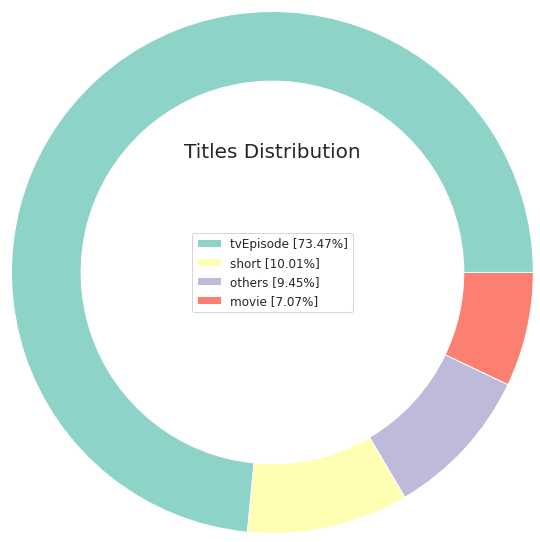

In [36]:
# Plot

# Color map
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Create figure
f = plt.figure()

# Pie Plot
plt.pie(result_1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = .8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Titles Distribution", loc = "Center", fontdict = {'fontsize':20,'fontweight':20})
plt.show()

## 2- What is the number of titles by genre?
#### 2- Qual o Número de Títulos Por Gênero?

In [37]:
# Created SQL query
consult_2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres'''

In [38]:
# Result
result_2 = pd.read_sql_query(consult_2, connection)

In [39]:
 display(result_2)

,genres,COUNT(*)
0,Action,13522
1,"Action,Adult",11
2,"Action,Adult,Adventure",1
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1444,"Thriller,Western",40
1445,War,1264
1446,"War,Western",9
1447,Western,4054


In [40]:
# Lowercase
result_2['genres'] = result_2['genres'].str.lower().values # Obs: CountVectorizer already process lowercase in argument, so this cell might be considered redundant (just to ensure the correct managing of data)

In [41]:
# Cleaning data
temp = result_2['genres'].dropna()

###### Here, it is used CountVectorizer to convert the genres column in a one-hot encoded vector in order to count the number of movies in each genre.



In [42]:
# Creating regular expression to filter strings

pattern = '(?u)\\b[\\w-]+\\b' # https://docs.python.org/3.8/library/re.html

vector = CountVectorizer(token_pattern = pattern, analyzer = 'word').fit(temp) # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# CountVectorizer converts a collection of text documents to a matrix of token counts.
# The fit() method takes the training data (temp, in this case) as arguments. Obs: words that were not seen in the training corpus will be completely ignored in future calls to the transform method


In [43]:
type(vector)

sklearn.feature_extraction.text.CountVectorizer

In [44]:
# Apply vectorization to dataset without NA values
bag_genres = vector.transform(temp)

In [45]:
type(bag_genres)

scipy.sparse.csr.csr_matrix

In [46]:
# Return unique genres
genres_unique = vector.get_feature_names()

In [47]:
# Creates the dataframe of genres
genres = pd.DataFrame(bag_genres.todense(), columns = genres_unique, index = temp.index)

In [48]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1448
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1449 non-null   int64
 1   adult        1449 non-null   int64
 2   adventure    1449 non-null   int64
 3   animation    1449 non-null   int64
 4   biography    1449 non-null   int64
 5   comedy       1449 non-null   int64
 6   crime        1449 non-null   int64
 7   documentary  1449 non-null   int64
 8   drama        1449 non-null   int64
 9   family       1449 non-null   int64
 10  fantasy      1449 non-null   int64
 11  film-noir    1449 non-null   int64
 12  game-show    1449 non-null   int64
 13  history      1449 non-null   int64
 14  horror       1449 non-null   int64
 15  music        1449 non-null   int64
 16  musical      1449 non-null   int64
 17  mystery      1449 non-null   int64
 18  n            1449 non-null   int64
 19  news         1449 non-null   int64
 20  reality-

In [49]:
# Drop column 'n'
genres = genres.drop(columns = 'n', axis = 0)

In [50]:
# Compute the percentage
genres_percentage = 100 * pd.Series(genres.sum()).sort_values(ascending = False) / genres.shape[0]

In [52]:
genres_percentage.head(10)

drama          18.357488
comedy         16.839199
documentary    15.942029
adventure      14.906832
action         14.561767
romance        13.457557
crime          13.112491
mystery        12.560386
thriller       12.353347
fantasy        12.215321
dtype: float64

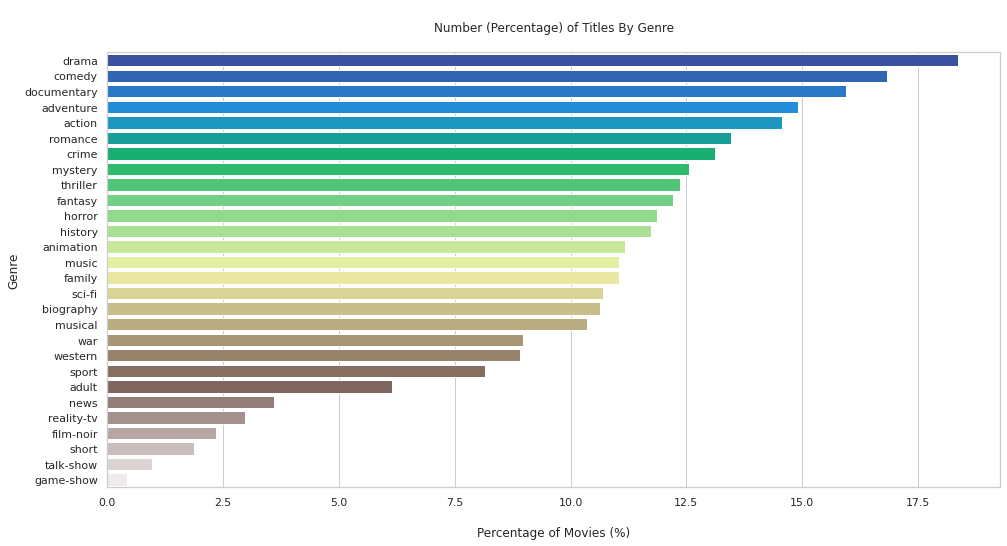

In [54]:
# Plot
plt.figure(figsize = (16, 8))
sns.barplot(x = genres_percentage.values, y = genres_percentage.index, orient = 'h', palette = 'terrain')
plt.ylabel('Genre')
plt.xlabel('\nPercentage of Movies (%)')
plt.title('\nNumber (Percentage) of Titles By Genre\n')
plt.show()

## 3 - What is the ratings median of movies by genre?
#### 3- Qual a Mediana de Avaliação dos Filmes Por Gênero? 

#### Why median and not mean?
###### Median is a **resistent** measure, in way that it doesn't get affected by outliers, whereas mean it is not, in particular for strong assimetric distributions or having atypical values. Nevertheless, mean is a good measure if data distribution is nearly normal. 

In [55]:
# Created SQL query
consult_3 = '''
            SELECT rating, genres FROM
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            '''

In [56]:
# Result
result_3 = pd.read_sql_query(consult_3, connection)

In [57]:
display(result_3)

,rating,genres
0,4.5,\N
1,6.1,"Action,Adventure,Biography"
2,5.2,Drama
3,4.5,Drama
4,3.8,Drama
...,...,...
269658,3.5,"Action,Adventure,Thriller"
269659,5.8,Thriller
269660,6.4,"Drama,History"
269661,3.8,"Adventure,History,War"


In [58]:
# Function to return genres (the same done in question 2, without functionalizing, which sometimes might be not appropriate)
def return_genres(df):
  df['genres'] = df['genres'].str.lower().values
  temp = df['genres'].dropna()
  vector = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
  genres_unique = vector.get_feature_names()
  genres_unique = [genre for genre in genres_unique if len(genre) > 1]
  return genres_unique

In [59]:
genres_unique = return_genres(result_3)

In [60]:
genres_unique

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [61]:
genre_counts = list()
genre_ratings = list()

In [62]:
# Loop
for item in genres_unique:

  # Returns the count of movies by genre
  consult = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id = titles.title_id WHERE genres LIKE' + '\''+'%'+item+'%'+'\' AND type=\'movie\''
  result = pd.read_sql_query(consult, connection)
  genre_counts.append(result.values[0][0])

  # Returns the movies ratings by genre
  consult = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id = titles.title_id WHERE genres LIKE' + '\''+'%'+item+'%'+'\' AND type=\'movie\''
  result = pd.read_sql_query(consult, connection)
  genre_ratings.append(np.median(result['rating']))


In [63]:
# Final dataframe
df_genre_ratings = pd.DataFrame()
df_genre_ratings['genres'] = genres_unique
df_genre_ratings['count'] = genre_counts
df_genre_ratings['rating'] = genre_ratings

In [64]:
df_genre_ratings.head(20)

,genres,count,rating
0,action,28907,5.8
1,adult,4100,5.8
2,adventure,17661,6.0
3,animation,4717,6.5
4,biography,8122,7.0
5,comedy,67083,6.0
6,crime,23208,6.1
7,documentary,39655,7.3
8,drama,119734,6.3
9,family,10193,6.3


In [65]:
# Drop of index 18 (news) (we don't want this information as genre)
df_genre_ratings = df_genre_ratings.drop(index = 18)

In [66]:
# Sorting
df_genre_ratings = df_genre_ratings.sort_values(by = 'rating', ascending = False)

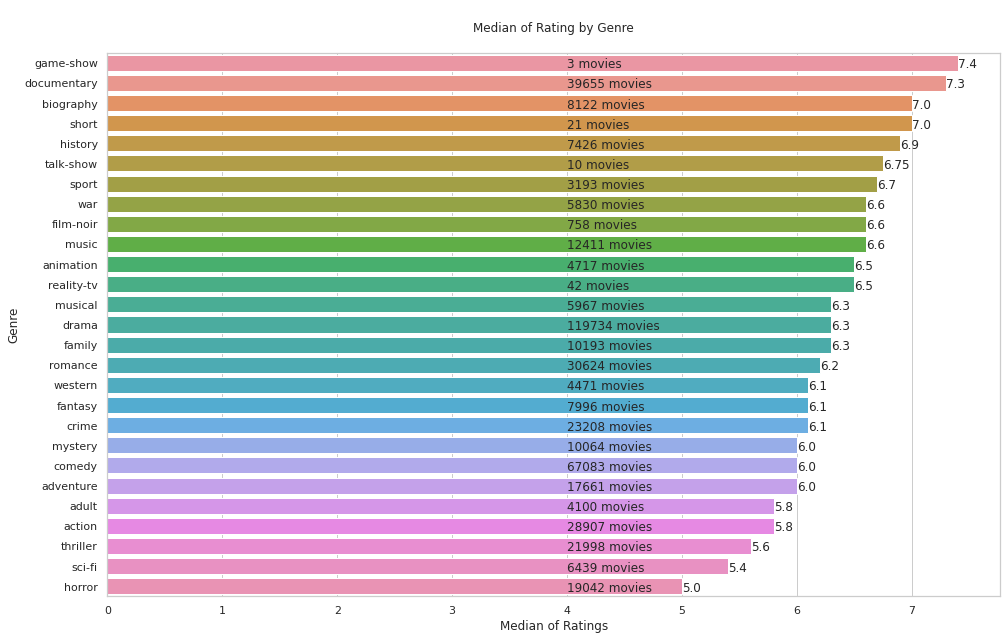

In [67]:
# Plot

# Figure
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genre_ratings.genres, x = df_genre_ratings.rating, orient = "h")

# Texts
for i in range(len(df_genre_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genre_ratings['count'][df_genre_ratings.index[i]]) + " movies")
    
    plt.text(df_genre_ratings.rating[df_genre_ratings.index[i]],
             i + 0.25,
             round(df_genre_ratings["rating"][df_genre_ratings.index[i]],2))

plt.ylabel('Genre')             
plt.xlabel('Median of Ratings')
plt.title('\nMedian of Rating by Genre\n')
plt.show()

## 4 - What is the median of movies ratings by year of release?
#### 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?

In [68]:
# Created SQL query
consult_4 = '''SELECT rating, premiered FROM
                ratings JOIN titles ON ratings.title_id = titles.title_id
                WHERE premiered <= 2025 AND type = 'movie' 
                ORDER BY premiered
             '''

In [69]:
# Result
result_4 = pd.read_sql_query(consult_4, connection)

In [70]:
result_4

,rating,premiered
0,6.4,1896
1,4.4,1897
2,3.9,1899
3,3.7,1899
4,6.0,1900
...,...,...
269658,9.1,2021
269659,5.6,2021
269660,5.9,2021
269661,8.0,2021


In [71]:
# Computing the median of ratings by year
ratings = []
for year in set(result_4['premiered']):
  ratings.append(np.median(result_4[result_4['premiered'] == year]['rating']))

In [72]:
# Years list
years = list(set(result_4['premiered']))

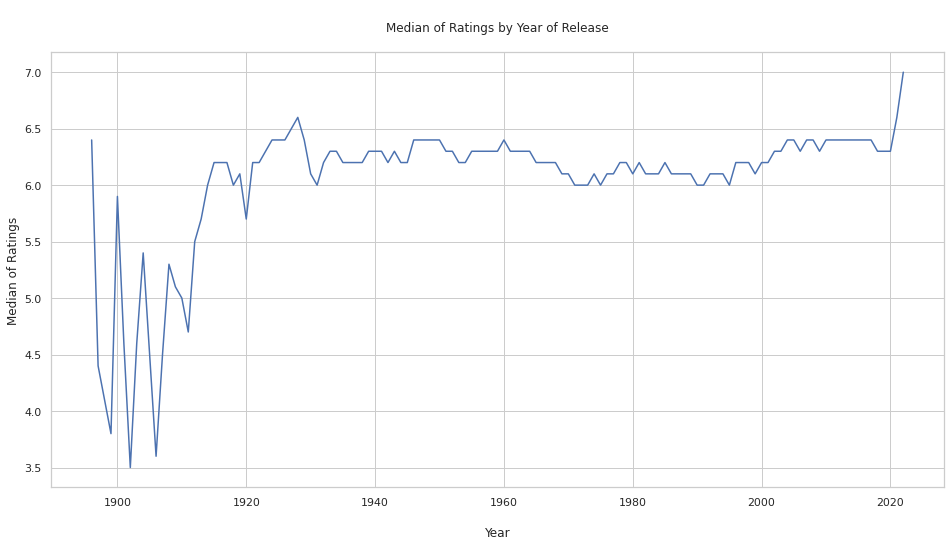

In [73]:
# Plot
plt.figure(figsize = (16, 8))
plt.plot(years, ratings)
plt.xlabel('\nYear')
plt.ylabel('Median of Ratings')
plt.title('\nMedian of Ratings by Year of Release\n')
plt.show()

## 5 - What is the number of rated movies by genre related to the year of release?
#### 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?

In [76]:
# Created SQL query
consult_5 = '''
             SELECT genres FROM titles 
             '''

In [77]:
# Result
result_5 = pd.read_sql_query(consult_5, connection)

In [78]:
result_5

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
8353453,"Action,Drama,Family"
8353454,"Action,Drama,Family"
8353455,"Action,Drama,Family"
8353456,Short


In [80]:
# Returns uniques genres
genre_unique = return_genres(result_5) # function created in previous section (Section 4)

In [81]:
# Counting
genre_count = list()
for item in genre_unique:
  consult = 'SELECT COUNT(*) COUNT FROM titles WHERE genres LIKE '+'\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2025'
  result = pd.read_sql_query(consult, connection)
  genre_count.append(result['COUNT'].values[0])

In [82]:
# Creating dataframe
df_genre_count = pd.DataFrame()
df_genre_count['genre'] = genre_unique
df_genre_count['Count'] = genre_count

In [83]:
# Compute
df_genre_count = df_genre_count[df_genre_count['genre'] != 'n'] # same as the drop function used above in the other section
df_genre_count = df_genre_count.sort_values(by = 'Count', ascending = False)
top_genres = df_genre_count.head()['genre'].values # to show only the five most expressive genres

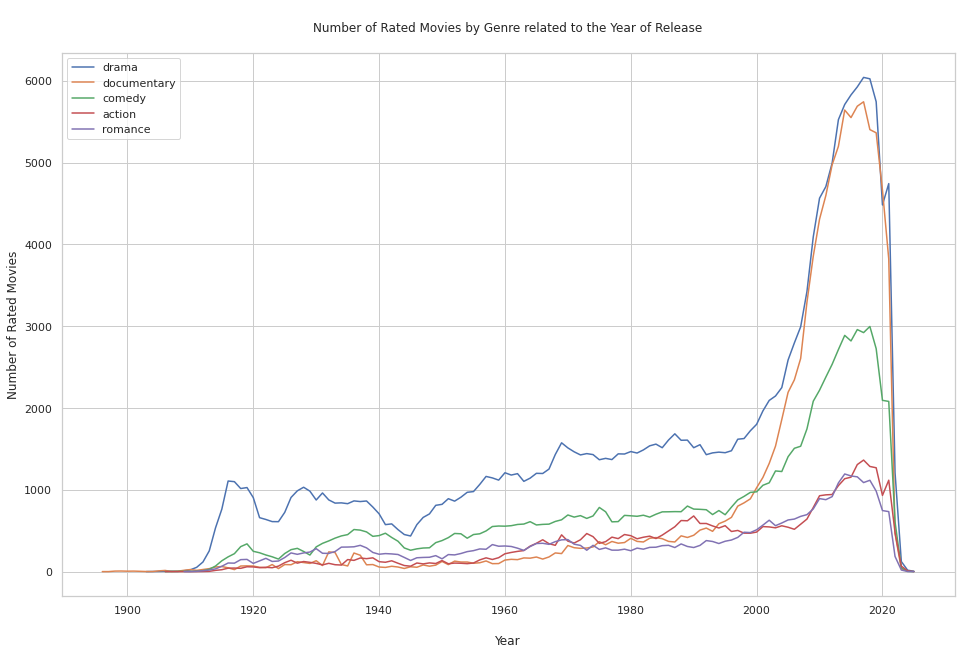

In [84]:
# Plot

# Figure
plt.figure(figsize = (16, 10))

# Plot
for item in top_genres:
  consult = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM titles WHERE genres LIKE ' + '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2025 GROUP BY Year'
  result = pd.read_sql_query(consult, connection)
  plt.plot(result['Year'], result['Number_of_movies'])

plt.xlabel('\nYear')
plt.ylabel('Number of Rated Movies')
plt.title('\nNumber of Rated Movies by Genre related to the Year of Release\n')
plt.legend(labels = top_genres)
plt.show()

## 6 - What is the movie with longest time duration?
#### 6 - Qual o Filme Com Maior Tempo de Duração?

In [85]:
# Created SQL query
consult_6 = '''
             SELECT runtime_minutes Runtime 
             FROM titles 
             WHERE type = 'movie' AND Runtime != 'NaN'
             '''

In [86]:
# Result
result_6 = pd.read_sql_query(consult_6, connection)

In [87]:
result_6

,Runtime
0,100
1,70
2,90
3,120
4,58
...,...
371761,123
371762,57
371763,100
371764,116


In [88]:
# Loop to compute the percentiles
for i in range(101):
  val = i
  perc = round(np.percentile(result_6['Runtime'].values, val), 2)
  print(f'{val}th runtime percentile is: {perc}')

0th runtime percentile is: 1.0
1th runtime percentile is: 45.0
2th runtime percentile is: 48.0
3th runtime percentile is: 50.0
4th runtime percentile is: 50.0
5th runtime percentile is: 52.0
6th runtime percentile is: 52.0
7th runtime percentile is: 54.0
8th runtime percentile is: 55.0
9th runtime percentile is: 56.0
10th runtime percentile is: 58.0
11th runtime percentile is: 59.0
12th runtime percentile is: 60.0
13th runtime percentile is: 60.0
14th runtime percentile is: 60.0
15th runtime percentile is: 62.0
16th runtime percentile is: 63.0
17th runtime percentile is: 65.0
18th runtime percentile is: 66.0
19th runtime percentile is: 68.0
20th runtime percentile is: 70.0
21th runtime percentile is: 70.0
22th runtime percentile is: 71.0
23th runtime percentile is: 72.0
24th runtime percentile is: 73.0
25th runtime percentile is: 74.0
26th runtime percentile is: 75.0
27th runtime percentile is: 75.0
28th runtime percentile is: 76.0
29th runtime percentile is: 77.0
30th runtime percenti

In [89]:
# SQL Consult again to return the film of longest time duration
consult_6 = '''
             SELECT primary_title, runtime_minutes Runtime 
             FROM titles 
             WHERE type = 'movie' AND Runtime != 'NaN'
             ORDER BY Runtime DESC
             LIMIT 1
             '''

In [90]:
# Result
result_6 = pd.read_sql_query(consult_6, connection)

In [91]:
result_6

,primary_title,Runtime
0,Logistics,51420


##### <a href = https://en.wikipedia.org/wiki/Logistics_(film)>Logistics</a>, or Logistics Art Project, is a 2012 Swedish experimental film conceived and created by Erika Magnusson and Daniel Andersson. At 51,420 minutes (857 hours or 35 days and 17 hours), it is the longest film ever made.

## 7 - What is the relation between duration and genre?
#### 7- Qual a Relação Entre Duração e Gênero?

In [92]:
# Created SQL query
consult_7 = '''
             SELECT AVG(runtime_minutes) Runtime, genres
             FROM titles
             WHERE type = 'movie'
             AND runtime_minutes != 'NaN'
             GROUP BY genres
             '''

In [93]:
# Result
result_7 = pd.read_sql_query(consult_7, connection)

In [94]:
result_7

,Runtime,genres
0,99.320314,Action
1,77.000000,"Action,Adult"
2,69.000000,"Action,Adult,Adventure"
3,74.000000,"Action,Adult,Comedy"
4,84.666667,"Action,Adult,Crime"
...,...,...
1361,93.928571,"Thriller,Western"
1362,93.302048,War
1363,98.000000,"War,Western"
1364,72.222341,Western


In [95]:
# Returns uniques genres
genres_unique = return_genres(result_7)

In [96]:
# Compute time duration by genre
genre_runtime = list()
for item in genres_unique:
  consult = 'SELECT runtime_minutes Runtime FROM titles WHERE genres LIKE ' + '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime != \'NaN\''
  result = pd.read_sql_query(consult, connection)
  genre_runtime.append(np.median(result['Runtime']))

In [97]:
# Creating dataframe
df_genre_runtime = pd.DataFrame()
df_genre_runtime['genre'] = genres_unique
df_genre_runtime['runtime'] = genre_runtime

In [98]:
# Removing index 18 (news)
df_genre_runtime = df_genre_runtime.drop(index = 18)

In [99]:
# Sorting
df_genre_runtime = df_genre_runtime.sort_values(by = 'runtime', ascending = False)

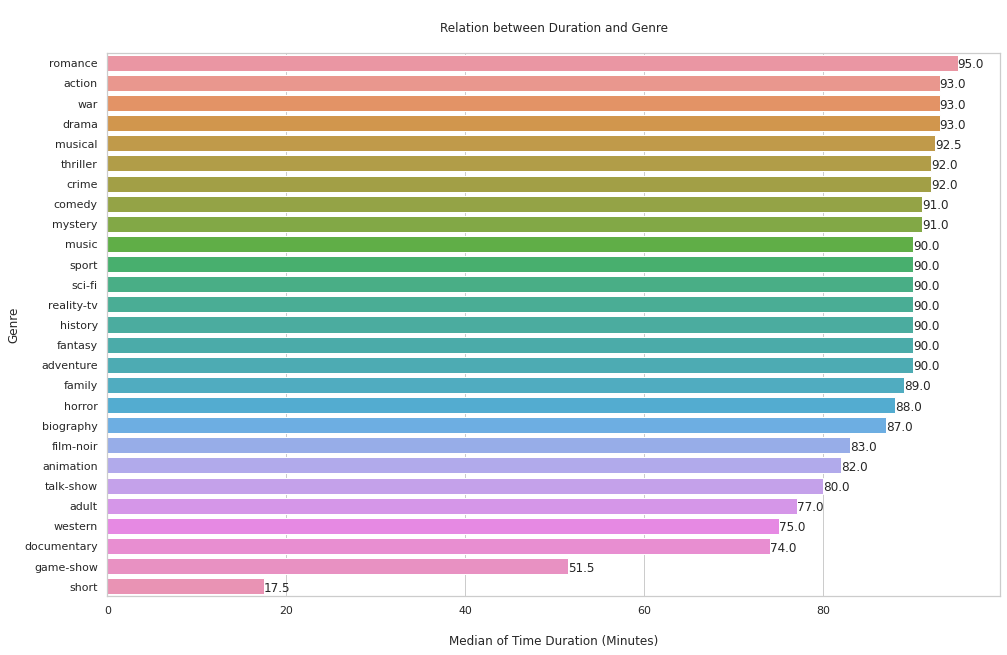

In [100]:
# Plot

# Figure size
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genre_runtime.genre, x = df_genre_runtime.runtime, orient = 'h')

# Loop
for i in range(len(df_genre_runtime.index)):
  plt.text(df_genre_runtime.runtime[df_genre_runtime.index[i]],
           i + .25,
           round(df_genre_runtime["runtime"][df_genre_runtime.index[i]], 2))

plt.ylabel('Genre')
plt.xlabel('\nMedian of Time Duration (Minutes)')
plt.title('\nRelation between Duration and Genre\n')
plt.show()


#### Alternative solution to question 7

In [101]:
# Consult SQL
consult_7 = '''
             SELECT genres, runtime_minutes Runtime 
             FROM titles 
             WHERE type = 'movie' AND genres != '\\N' AND Runtime != 'NaN'
             '''

In [102]:
# Result
result_7 = pd.read_sql_query(consult_7, connection)

In [104]:
# Return uniques genres
genres_unique = return_genres(result_7)

In [105]:
genre_runtime = list()
genre_counts = list()

In [106]:
for item in genres_unique:
  consult = 'SELECT COUNT(genres) AS COUNT FROM titles WHERE genres LIKE' + '\''+'%'+item+'%'+'\' AND type=\'movie\''
  result = pd.read_sql_query(consult, connection)
  genre_counts.append(result.values[0][0])  

  consult = 'SELECT genres, runtime_minutes FROM titles WHERE genres LIKE' + '\''+'%'+item+'%'+'\' AND type=\'movie\''
  result = pd.read_sql_query(consult, connection)
  result = result.dropna()
  genre_runtime.append(np.median(result['runtime_minutes']))

In [107]:
# Creating dataframe
df_genre_runtime = pd.DataFrame()
df_genre_runtime['Genre'] = genres_unique
df_genre_runtime['Runtime'] = genre_runtime
df_genre_runtime['Count'] = genre_counts
df_genre_runtime

,Genre,Runtime,Count
0,action,93.0,50552
1,adult,77.0,8338
2,adventure,90.0,26589
3,animation,82.0,7896
4,biography,87.0,15534
5,comedy,91.0,100629
6,crime,92.0,34045
7,documentary,74.0,108786
8,drama,93.0,212326
9,family,89.0,16123


In [108]:
# Removing index 18 (news)
df_genre_runtime = df_genre_runtime.drop(index = 18)

In [109]:
# Sorting
df_genre_runtime = df_genre_runtime.sort_values(by = 'Runtime', ascending = False)

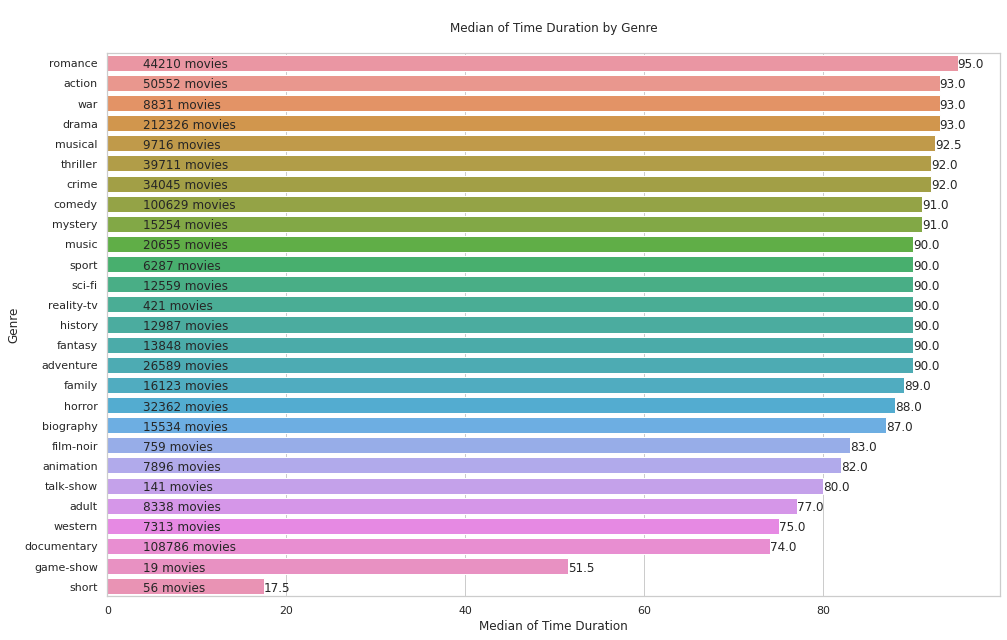

In [111]:
# Plot 

plt.figure(figsize=(16, 10))

# Barplot 
sns.barplot(y= df_genre_runtime.Genre, x = df_genre_runtime.Runtime, orient = 'h')

# Texts
for i in range(len(df_genre_runtime.index)):

  plt.text(4.0,
           i + .25,
           str(df_genre_runtime['Count'][df_genre_runtime.index[i]]) + ' movies')
  
  plt.text(df_genre_runtime.Runtime[df_genre_runtime.index[i]],
           i + .25,
           round(df_genre_runtime['Runtime'][df_genre_runtime.index[i]], 2))

plt.ylabel('Genre')
plt.xlabel('Median of Time Duration')
plt.title('\nMedian of Time Duration by Genre\n')
plt.show()

## 8 - What is the number of movies produced by a country?
#### 8- Qual o Número de Filmes Produzidos Por País?


In [112]:
# Created SQL query
consult_8 = '''
             SELECT region, COUNT(*) Number_of_movies FROM 
             akas JOIN titles ON
             akas.title_id = titles.title_id
             WHERE region != 'None'
             AND type = \'movie\'
             GROUP BY region
             '''

In [113]:
# Result
result_8 = pd.read_sql_query(consult_8, connection)
result_8

,region,Number_of_movies
0,AD,22
1,AE,2069
2,AF,109
3,AG,12
4,AL,1238
...,...,...
229,YUCS,146
230,ZA,3071
231,ZM,12
232,ZRCD,2


In [114]:
# Shape
result_8.shape # returns the number of rows and columns of dataframe (rows, columns)

(234, 2)

In [115]:
# Auxiliary lists
names_countries = list()
counting = list()

In [116]:
#  Loop to get the country according to the region column
for i in range(result_8.shape[0]):
  try:
    coun = result_8['region'].values[i]
    names_countries.append(pycountry.countries.get(alpha_2 = coun).name)
    counting.append(result_8['Number_of_movies'].values[i])
  except:
    continue
    

In [117]:
# Creating dataframe
df_films_countries = pd.DataFrame()
df_films_countries['Country'] = names_countries
df_films_countries['Numer_of_movies'] = counting 

In [118]:
# Sorting
df_films_countries = df_films_countries.sort_values(by = 'Numer_of_movies', ascending = False)

In [119]:
df_films_countries.head(10)

,Country,Numer_of_movies
199,United States,299114
65,United Kingdom,153533
96,Japan,89388
63,France,82221
89,India,75357
32,Canada,71796
47,Germany,67671
93,Italy,63967
26,Brazil,63238
58,Spain,62877


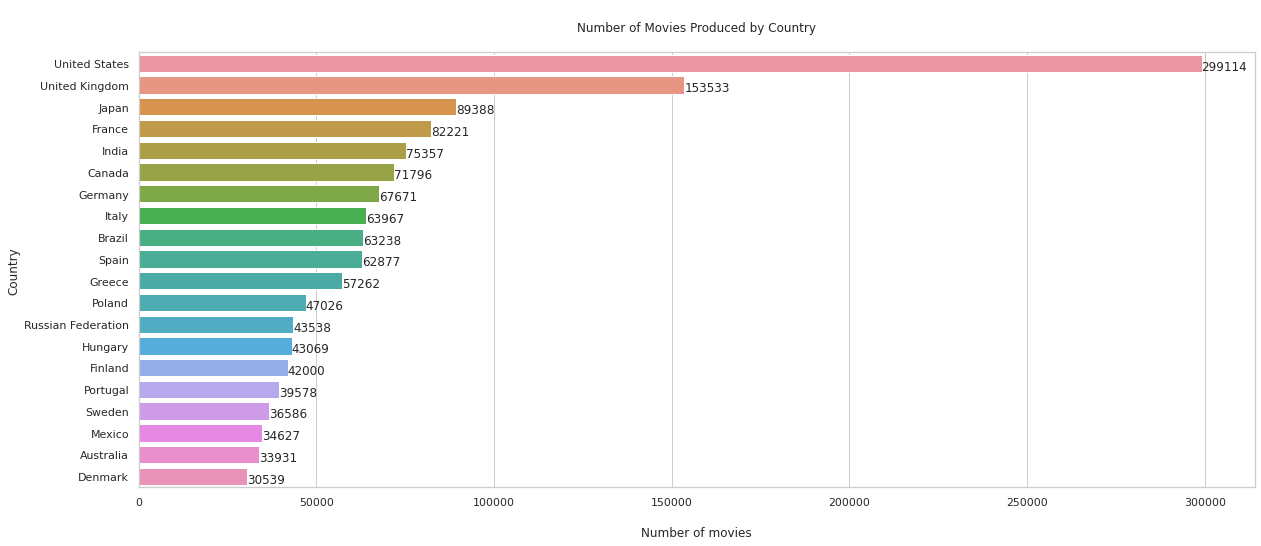

In [120]:
# Plot 

# Figure
plt.figure(figsize = (20, 8))

# Barplot
sns.barplot(y= df_films_countries[:20].Country, x = df_films_countries[:20].Numer_of_movies, orient = 'h')

# Loop
for i in range(0, 20):
  plt.text(df_films_countries.Numer_of_movies[df_films_countries.index[i]]-1,
           i + .30,
           round(df_films_countries['Numer_of_movies'][df_films_countries.index[i]], 2))

plt.ylabel('Country')
plt.xlabel('\nNumber of movies')
plt.title('\nNumber of Movies Produced by Country\n')
plt.show()

## 9 - What are the Top 10 best movies (according to ratings)?
#### 9- Quais São os Top 10 Melhores Filmes?

In [121]:
# Created SQL query
consult_9 = '''
             SELECT primary_title Movie_Name, genres, rating 
             FROM titles 
             JOIN ratings ON titles.title_id = ratings.title_id 
             WHERE type = \'movie\' AND ratings.votes >= 25000
             ORDER BY rating DESC
             LIMIT 10
             '''
# Obs: ratings.votes >= 25000 because doensn't make sense take in count movies with few ratings

In [122]:
# Result
result_9 = pd.read_sql_query(consult_9, connection)
result_9

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Chaos Class,"Comedy,Drama",9.3
2,The Godfather,"Crime,Drama",9.2
3,Soorarai Pottru,Drama,9.1
4,CM101MMXI Fundamentals,"Comedy,Documentary",9.1
5,Mirror Game,"Crime,Mystery,Thriller",9.1
6,12 Angry Men,"Crime,Drama",9.0
7,The Godfather: Part II,"Crime,Drama",9.0
8,The Dark Knight,"Action,Crime,Drama",9.0
9,David Attenborough: A Life on Our Planet,"Biography,Documentary",9.0


## 10 - What are the Top 10 worst movies (according to ratings)?
#### 10- Quais São os Top 10 Piores Filmes?



In [123]:
# Created SQL query
consult_10 = '''
             SELECT primary_title Movie_Name, genres, rating 
             FROM titles 
             JOIN ratings ON titles.title_id = ratings.title_id 
             WHERE titles.type = \'movie\' AND ratings.votes >= 25000
             ORDER BY rating ASC
             LIMIT 10
             '''
# Obs: ratings.votes >= 25000 because doensn't make sense take in count movies with few ratings

In [124]:
# Result
result_10 = pd.read_sql_query(consult_10, connection)
result_10

,Movie_Name,genres,rating
0,Cumali Ceber,Comedy,1.0
1,Smolensk,"Drama,Thriller",1.1
2,Sadak 2,"Action,Drama",1.1
3,Reis,"Biography,Drama",1.4
4,Justin Bieber: Never Say Never,"Documentary,Music",1.6
5,Manos: The Hands of Fate,"Drama,Horror",1.8
6,Radhe,"Action,Crime,Thriller",1.8
7,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.9
8,The Hottie & the Nottie,"Comedy,Romance",1.9
9,Disaster Movie,"Comedy,Sci-Fi",1.9
